# Lab_5

1.	Download Alice in Wonderland by Lewis Carroll from Project Gutenberg's website http://www.gutenberg.org/files/11/11-0.txt
2.	Perform any necessary preprocessing on the text, including converting to lower case, removing stop words, numbers / non-alphabetic characters, lemmatization.
3.	Find Top 10 most important (for example, in terms of TF-IDF metric) words from each chapter in the text (not "Alice"); how would you name each chapter according to the identified tokens?
4.	Find the Top 10 most used verbs in sentences with Alice. What does Alice do most often?
5.	*(not necessary) Find Top 100 most used verbs in sentences with Alice. Get word vectors using a pre-trained word2vec model and visualize them. Compare the words using embeddings. 



In [1]:
import spacy, en_core_web_sm
import textacy.extract
import textacy.ke
import pandas as pd
import seaborn as sns
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
file = open("Alice.txt",encoding="utf-8")
text = file.read()

### Let's leave only the main text of the story.

In [3]:
start = text.find("CHAPTER I.", text.find("CHAPTER I.") + 1)
end = text.find("THE END", text.find("CHAPTER I.") + 1)
text = text[start:end]

### Divide the main text of the story into chapters

In [4]:
chapters = text.split("CHAPTER")
chapters = chapters[1:]

### These are key terms from each chapter using Textacy’s SGRank algorithm.

In [5]:
nlp = spacy.load('en_core_web_sm')
for num, chptr in enumerate(chapters):
  doc = nlp(chptr)
  key = textacy.ke.sgrank(
      doc, ngrams=(1), normalize='lemma', topn=0.1)
  print("CHAPTER", num + 1)
  words = []
  for word in key:
        if word[0] != "Alice":
            words.append(word)
  print(words)

CHAPTER 1
[('way', 0.05497963823459028), ('time', 0.041401944810092066), ('Rabbit', 0.037769377670639336), ('book', 0.028137362052955035), ('little', 0.02336347626331272), ('picture', 0.021210513577277657), ('large', 0.018654431241290216), ('use', 0.017229035829332343), ('mind', 0.015884261955376337), ('thing', 0.015359617875886283), ('moment', 0.015152663712616362), ('hot', 0.014916354434735133), ('sister', 0.014529533950435828), ('conversation', 0.014490903296558721), ('hole', 0.013127004555177745), ('eye', 0.011972730293857203), ('waistcoat', 0.01108027661450799), ('pocket', 0.011062660573103622), ('watch', 0.011019268802381844), ('sleepy', 0.0110036062600293), ('daisy', 0.010606212308652527), ('door', 0.010504477197823141)]
CHAPTER 2
[('little', 0.08278504223978356), ('foot', 0.04694171280904837), ('dear', 0.04522473550320918), ('way', 0.027698628923053643), ('great', 0.02600804496267715), ('sure', 0.024000312056404537), ('large', 0.023125982231018125), ('time', 0.02296673299222779

### Get structured expressions with the word Alice

<AxesSubplot:ylabel='count'>

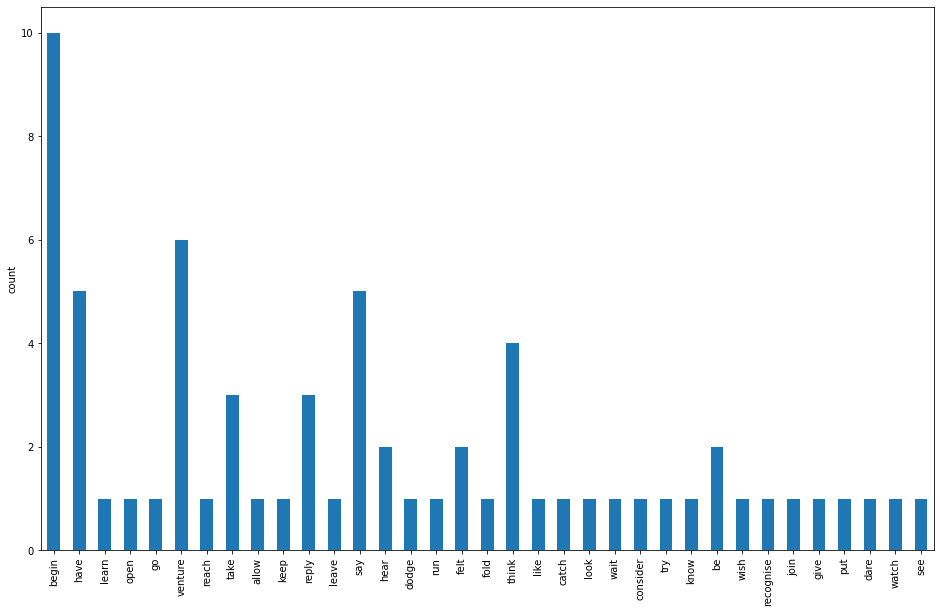

In [6]:
doc = nlp(text)
statements = textacy.extract.subject_verb_object_triples(doc)
lmtzr = WordNetLemmatizer()
d = {}
for statement in statements:
    if str(statement[0]) == "Alice":
        verb = str(statement[1]).split(" ")
        if verb[-1] != "not": verb = verb[-1]
        else: verb = verb[0]
        verb = lmtzr.lemmatize(verb,"v")
        if verb in d.keys(): d[verb]+= 1
        else: d[verb] = 1
s = pd.Series(d, index = d.keys())
s.plot(ylabel = "count", kind = "bar",figsize=(16,10))